In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Health_Sleep_Statistics.csv")
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


In [3]:
df.size


1200

In [4]:
df.columns.size

12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [6]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


**check null value**

In [7]:
df.isnull().sum()
#there will be no null value in the dataset

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

**check duplicate value**

In [8]:
df.duplicated().sum()

0

**drop user ID column**

In [9]:
df.drop(['User ID'], axis=1, inplace=True)

In [10]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


## **Age vs Sleep Quality**

In [11]:
#correlation

df[['Age', 'Sleep Quality']].corr()

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


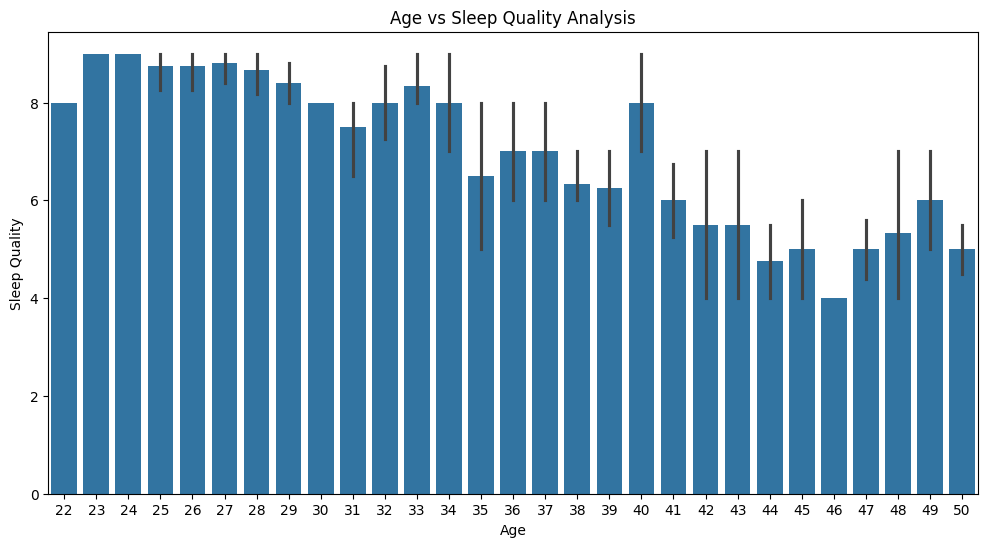

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age', y='Sleep Quality', data=df)
plt.title("Age vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()

x = df[['Age']]
y = df["Sleep Quality"]

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [14]:
#intercept
age_sleep_quality_model.intercept_

13.268812023190646

In [15]:
#slope
age_sleep_quality_model.coef_

array([-0.17408531])

In [16]:
age_sleep_quality_prediction = age_sleep_quality_model.predict(x)

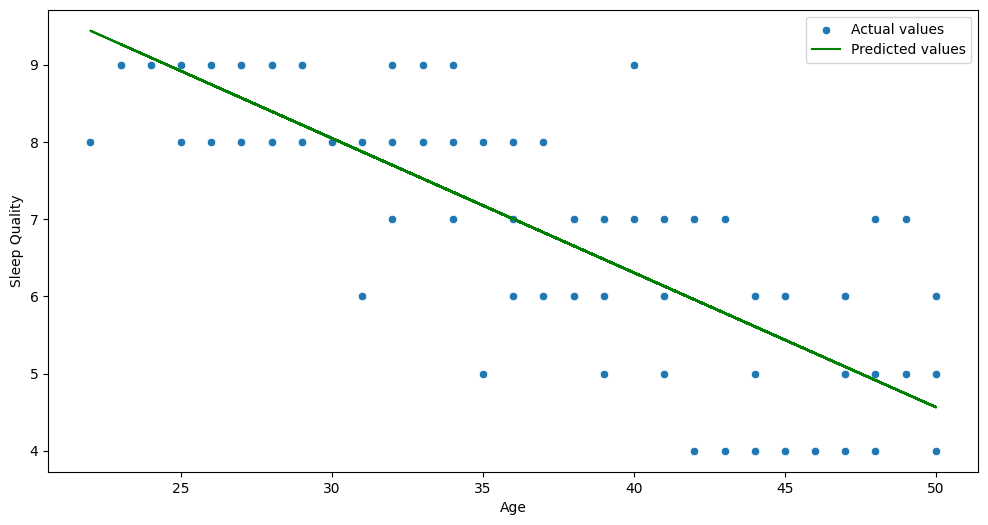

In [17]:
plt.figure(figsize=(12,6))
#sns.regplot(x="Age", y="Sleep Quality", data=df)
sns.scatterplot(x='Age', y='Sleep Quality', data=df, label="Actual values")
plt.plot(x, age_sleep_quality_prediction, color="green", label="Predicted values")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

from this data we can say that when age increases sleep quality will decrease

## **Gender vs Sleep Quality vs Physical Activity Level**

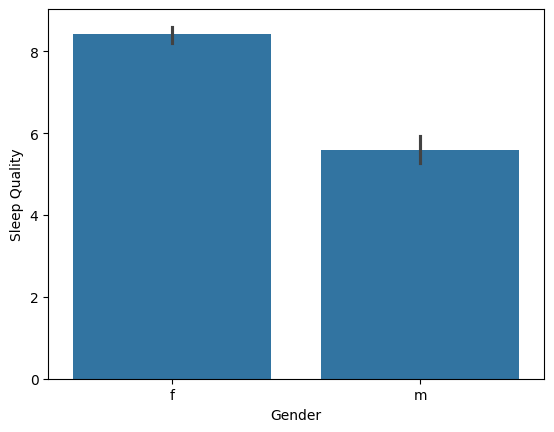

In [18]:
sns.barplot(x='Gender', y='Sleep Quality', data=df)
plt.show()

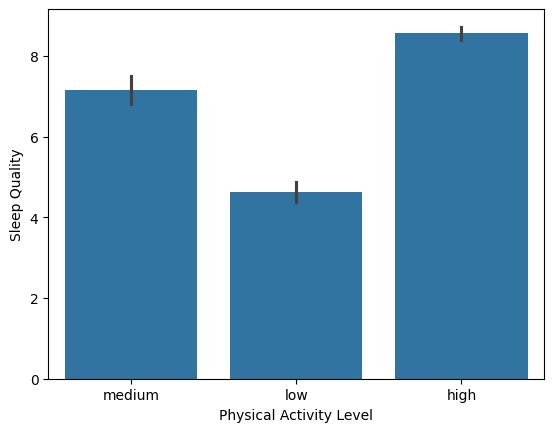

In [19]:
sns.barplot(x='Physical Activity Level', y='Sleep Quality', data=df)
plt.show()

In [20]:
#convert physical activity into numerical value

custom_code = {'low':1, 'medium':2, 'high':3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_code)

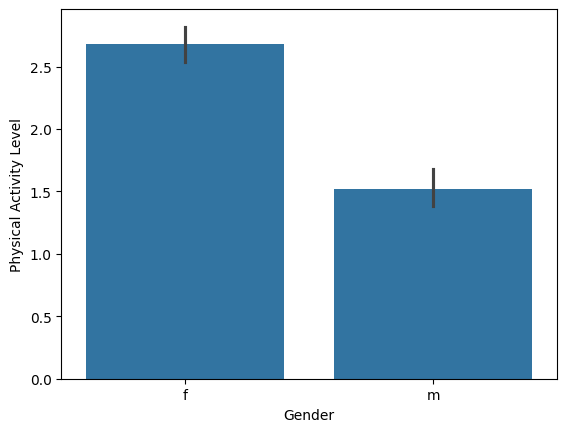

In [21]:
sns.barplot(x='Gender', y='Physical Activity Level', data=df)
plt.show()

from this data we can say female is doing high physical activity than the male that's why her sleep quality is better than the male

**from above information we can't say that it is correct or not we have to apply some hypothese on this or to apply this we have to find t-stastics-value and p-stastics-value**

### **t-stastics value**
- it tells us that our data is well enough (here data is less) enough to make significant change or not
- higher the t-value means there is high differnece between the sample mean and hypothesis mean
- it's give some what evidence

<img src="Screenshot 2024-11-09 174100.png">

### **p-stastics-value**
- it will answer that by using t-value that your evidence will be significant or not
- small p-value (<= 0.05) indicate strong evidence
- higher p-value (> 0.05) indicate weak evidence

In [22]:
sleep_quality_male = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_female = df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_male = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_female = df[df['Gender'] == 'f']['Physical Activity Level']

### **let's calculate the t and p-value for sleep quality and physical activity for male and female**

In [23]:
from scipy import stats

t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_male, sleep_quality_female)

print(f"t-value for sleep quality vs gender will be {t_sleep_quality:.2f}")
print(f"p-value for sleep quality vs gender will be {p_sleep_quality:.2f}")

t-value for sleep quality vs gender will be -14.32
p-value for sleep quality vs gender will be 0.00


In [24]:
t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_male, physical_activity_female)

print(f"t-value for physical activity vs gender will be {t_physical_activity:.2f}")
print(f"p-value for physical activity vs gender will be {p_physical_activity:.2f}")

t-value for physical activity vs gender will be -10.98
p-value for physical activity vs gender will be 0.00


From the t-value and p-value of both comparison is high and low respectively so we can't ignore this evidence

### **Time of sleep & wake up vs sleep quality**

In [25]:
df["Bedtime"].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [26]:
df["Wake-up Time"].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [27]:
def sleep_time_helper(str_time):
    h = str_time.split(":")[0]
    m = str_time.split(":")[1]

    return int(h) + int(m)/60

In [28]:
df['Bedtime'] = df['Bedtime'].apply(sleep_time_helper)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_time_helper)

In [29]:
df['Bedtime'].head()

0    23.00
1     0.50
2    22.75
3     1.00
4    23.50
Name: Bedtime, dtype: float64

In [30]:
df['Wake-up Time'].head()

0    6.50
1    7.00
2    6.75
3    6.50
4    7.00
Name: Wake-up Time, dtype: float64

In [31]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df['Sleep Duration Hours'].head()


0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hours, dtype: float64

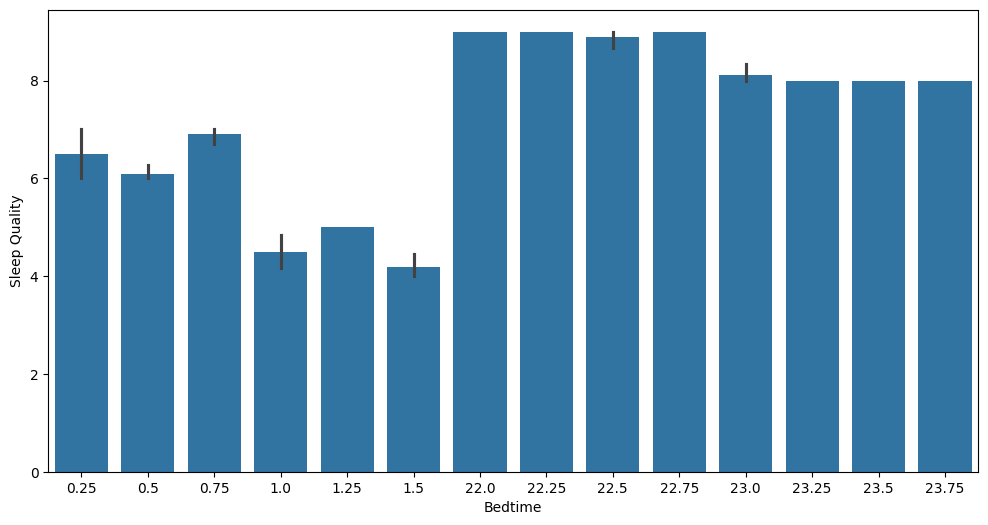

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime', y='Sleep Quality', data= df)
plt.show()

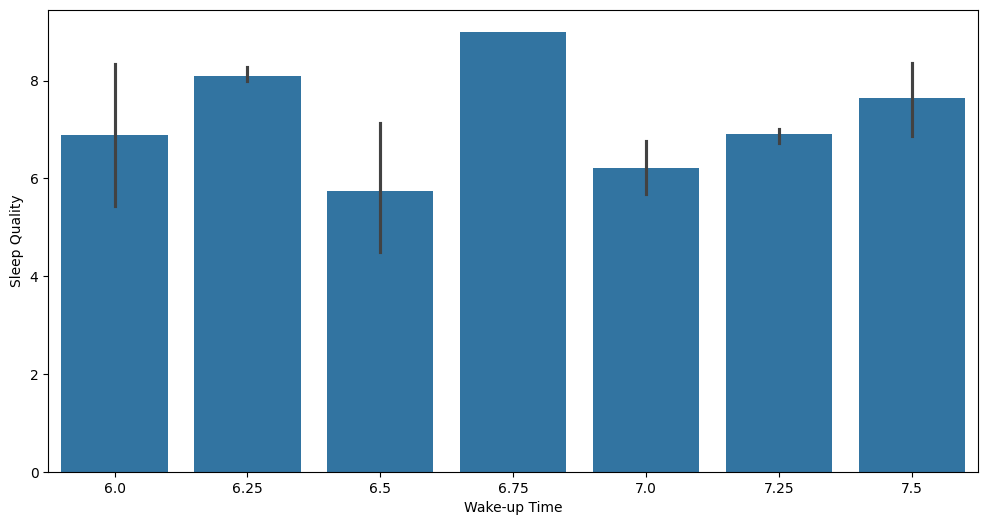

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x='Wake-up Time', y='Sleep Quality', data= df)
plt.show()

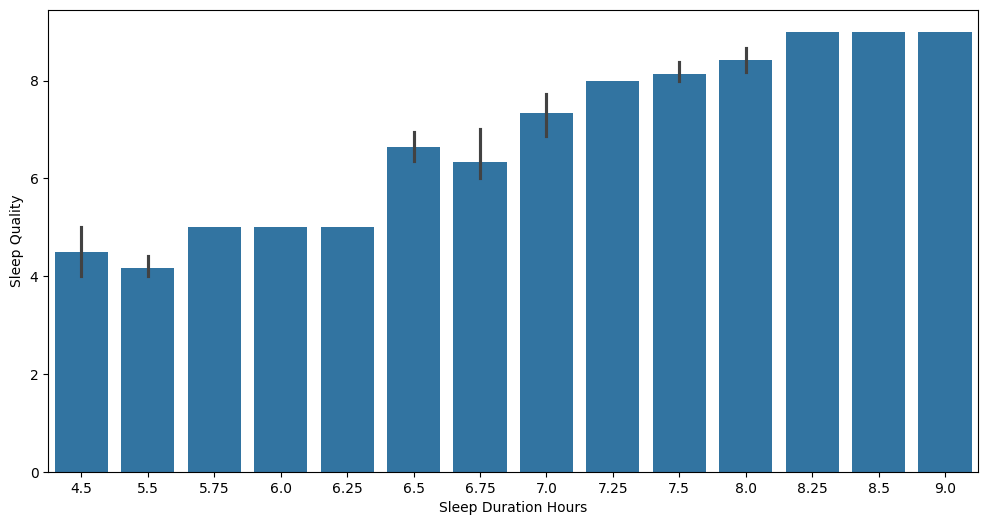

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sleep Duration Hours', y='Sleep Quality', data= df)
plt.show()

In [35]:
Sleep_duration_quality_model = LinearRegression()

x= df[['Sleep Duration Hours']]
y = df['Sleep Quality']

Sleep_duration_quality_model.fit(x,y)

prediction = Sleep_duration_quality_model.predict(x)

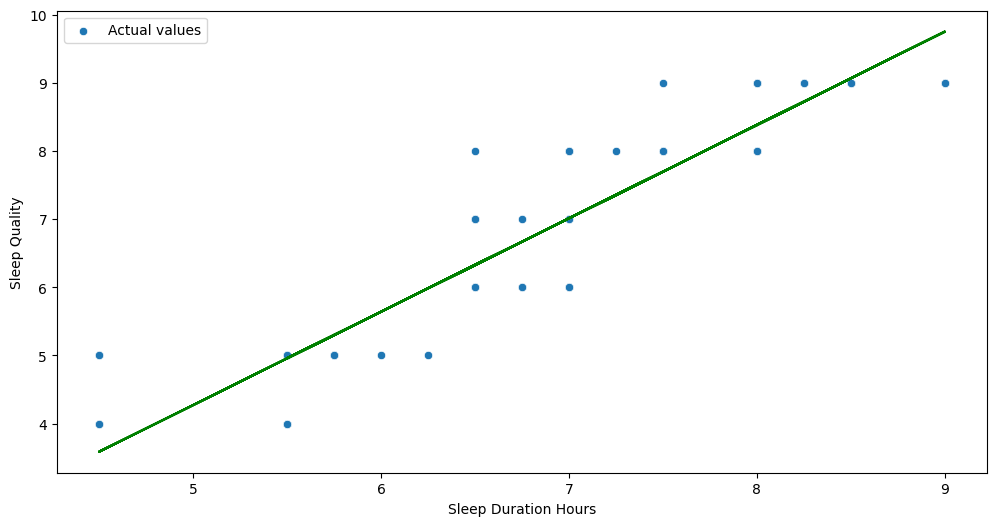

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Sleep Duration Hours', y='Sleep Quality', data=df, label= "Actual values")
plt.plot(x, prediction, color="green", label="Predicted value")
plt.show()

From this data we can conclude that better the sleep duartion hour or higher the duration hours better the sleep quality

### **Sleep Disorder vs Sleep Quality**

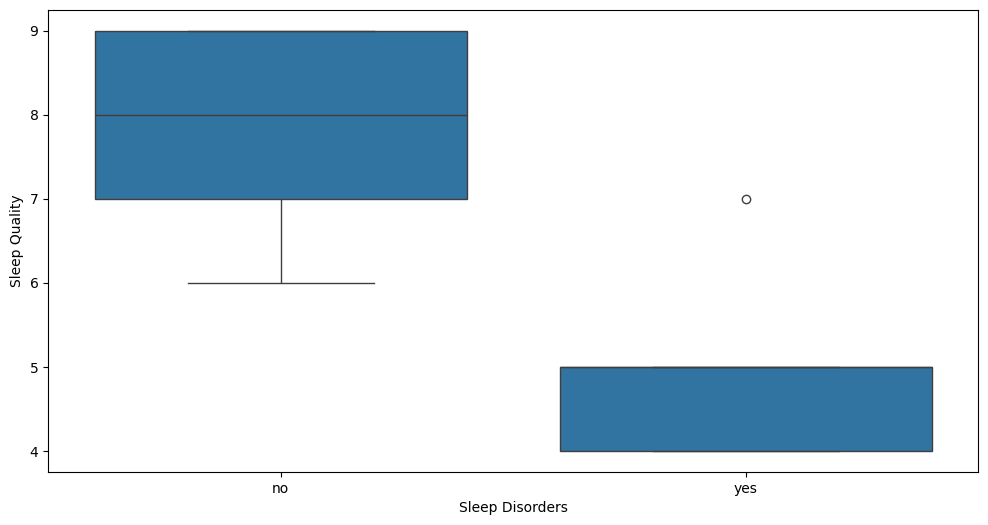

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df)
plt.show()

Here we can see who was having sleep disorder having less sleep quality there is one outlier in data.
A one who was not having sleep disorder having high sleep quality

**create heatmap of correlation of all attributes to each other to see the which affect the most or least with sleep quality**

**it is compulsory that all attribute should be int or float to plot in heatmap**

In [38]:
# create another datframe which having all column whoses dtype was int or float
df_numeric_feature = df.select_dtypes(include=['int64', 'float64'])
df_numeric_feature

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5
...,...,...,...,...,...,...,...,...
95,43,7,0.75,7.25,6500,2400,2,6.5
96,33,8,23.25,6.25,8500,2600,3,7.0
97,46,4,1.50,7.00,3000,2000,1,5.5
98,25,9,22.25,6.75,9500,2700,3,8.5


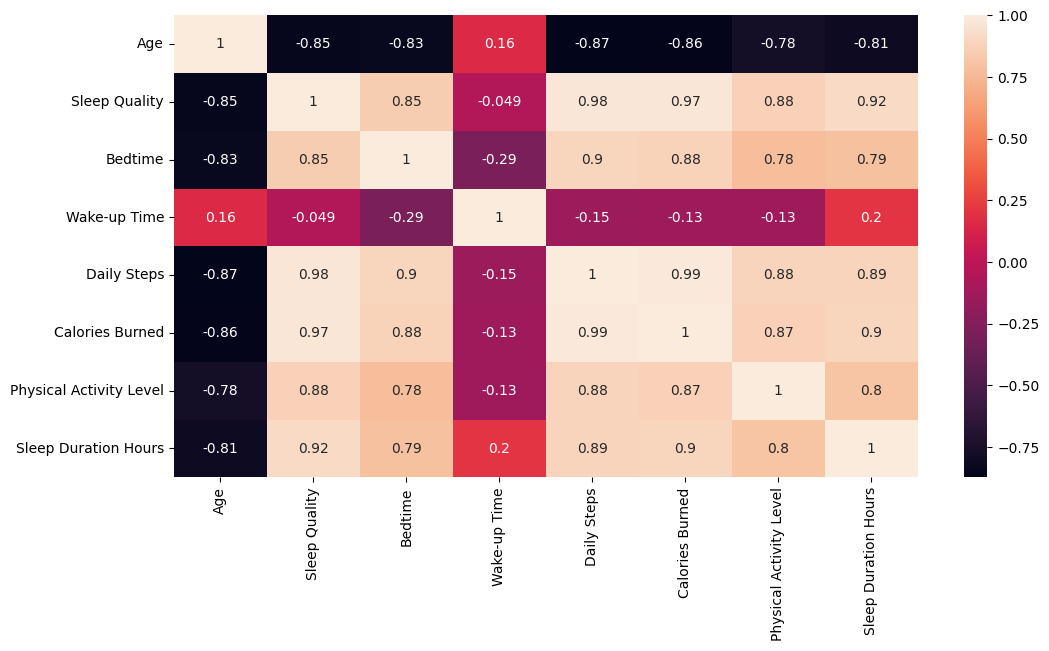

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric_feature.corr(), annot=True)
plt.show()

### **Amount of calories burned vs Sleep Quality**

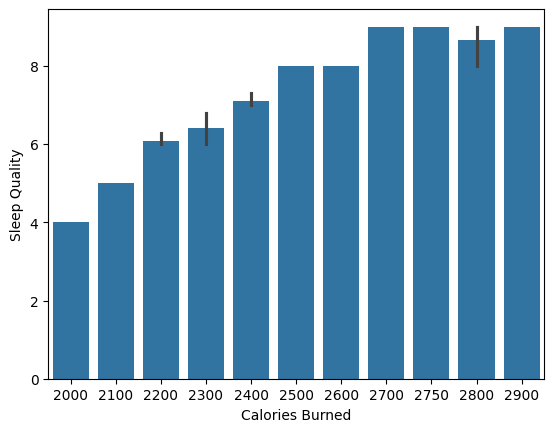

In [40]:
sns.barplot(x='Calories Burned', y='Sleep Quality', data=df)
plt.show()

In [41]:
calorie_burned_sleep_quality_model = LinearRegression()

x = df[['Calories Burned']]
y = df['Sleep Quality']

calorie_burned_sleep_quality_model.fit(x,y)

calorie_burned_sleep_quality_prediction = calorie_burned_sleep_quality_model.predict(x)

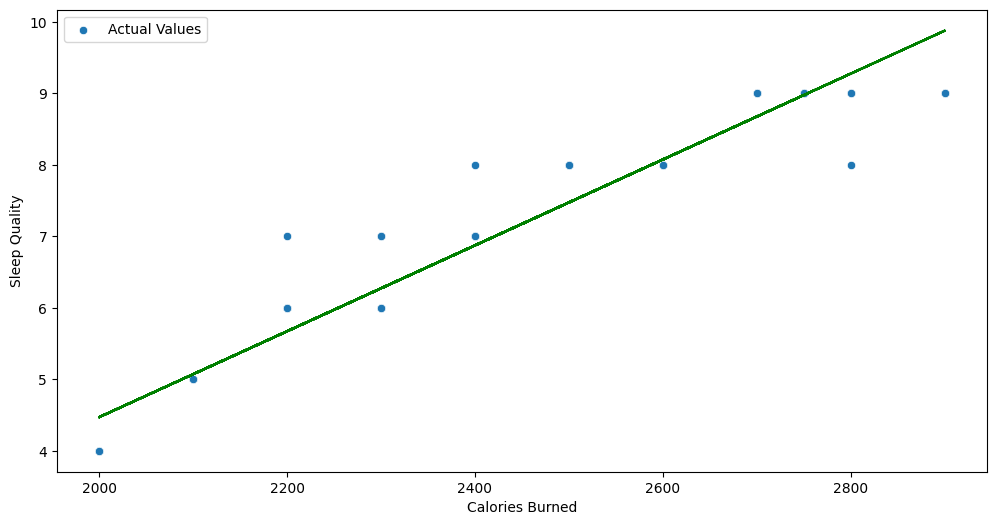

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Calories Burned', y='Sleep Quality', data=df, label="Actual Values")
plt.plot(x, calorie_burned_sleep_quality_prediction, color="green", label="Predicted values")
plt.show()

In [43]:
calorie_burned_sleep_quality_model.intercept_
calorie_burned_sleep_quality_model.coef_

array([0.00600954])

### **medication vs sleep quality**

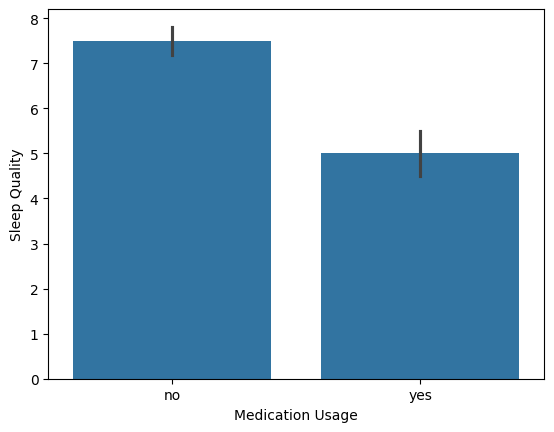

In [44]:
sns.barplot(x='Medication Usage', y='Sleep Quality', data=df)
plt.show()

In [45]:
# find t and p value

medication_usage_yes = df[df['Medication Usage'] == 'yes']['Sleep Quality']
medication_usage_no = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_value, p_value = stats.ttest_ind(medication_usage_yes, medication_usage_no)

print(f't-test Statistic for Sleep Quality: {t_value:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -7.04
p-value: 0.0000


from this data we can say that t_value is high and p_value is low it means this evidence will be significant

### **Dietary Habits vs Sleep quality**

In [46]:
df['Dietary Habits'].value_counts()

Dietary Habits
unhealthy    41
medium       30
healthy      29
Name: count, dtype: int64

In [47]:
# Define your custom codes
custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}

# Apply the custom codes using map()
df['Dietary Habits'] = df['Dietary Habits'].map(custom_codes)
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


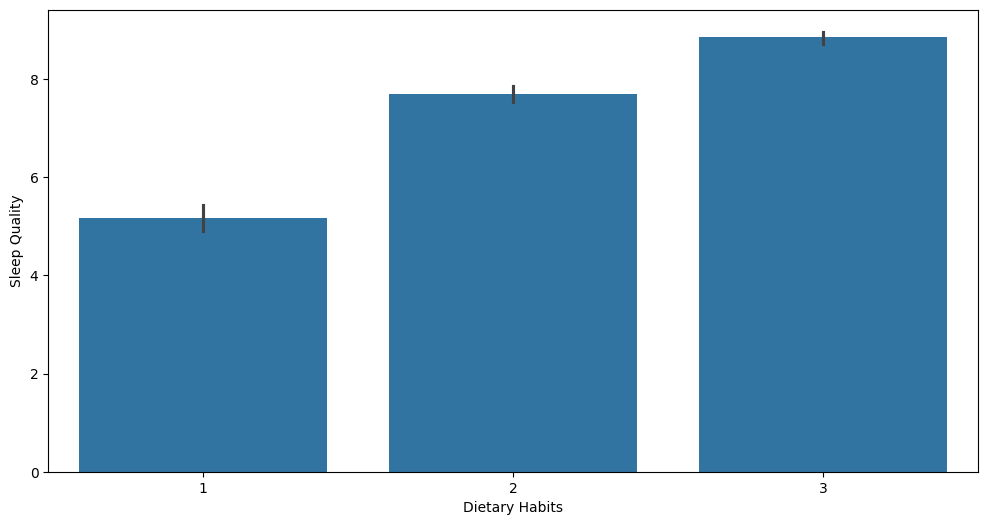

In [48]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.show()

## **Summary**

In [49]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

corr = df_numeric.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Dietary Habits             0.902498
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


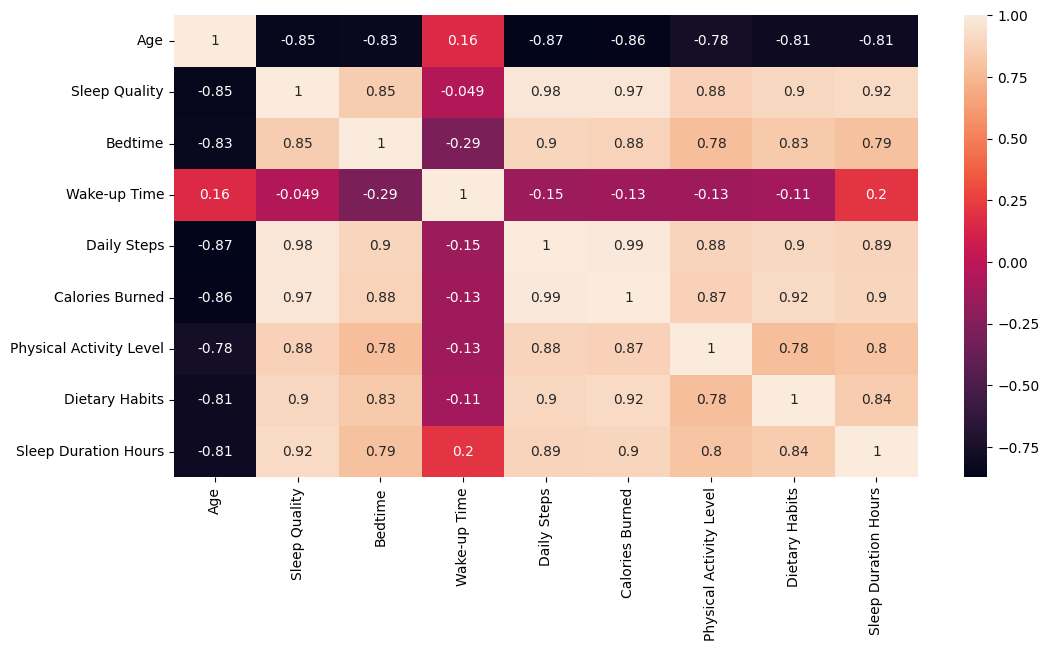

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.show()